Предварительная подготовка

In [38]:
# импортируем все библиотеки, которые могут понадобиться
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('default')
import seaborn as sns
import plotly
import plotly.express as px

# читаем и слегка редактируем базу данных 
# (удаляем бесполезный столбец и добавляем столбец со словесным обозначением статуса лояльности клиента)
# можно было бы перезаписать столбец, заменив числовые значения на буквенные, но они ещё могут пригодиться
churn_data = pd.read_csv('data/churn.csv')
churn_data = churn_data.drop('RowNumber', axis=1)
churn_data['Exited_word'] = churn_data['Exited'].apply(lambda x: 'Ушедший' if x == 1 else 'Лояльный')
churn_data.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Exited_word
0,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,Ушедший
1,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,Лояльный
2,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,Ушедший
3,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,Лояльный
4,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,Лояльный


## 9.1 Задание
Каково соотношение ушедших и лояльных клиентов?

Покажите это на графике и дайте комментарий по соотношению.

Text(0.5, 1.0, 'Соотношение лояльных и ушедших клиентов')

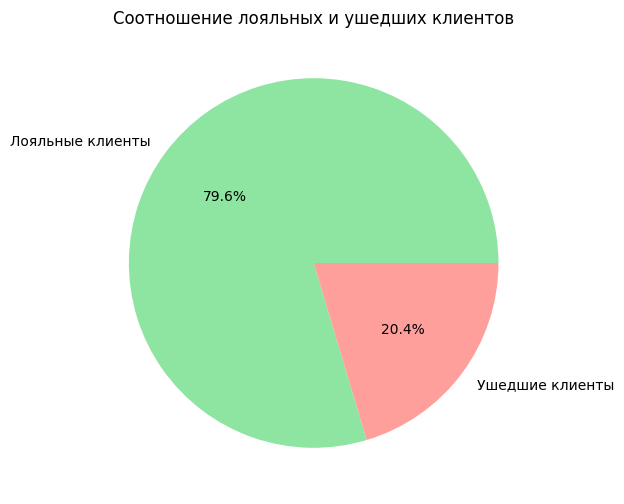

In [97]:
# создаём метки для секторов отдельной переменной, чтобы не нагромождать основную строчку кода
labels = ['Лояльные клиенты', 'Ушедшие клиенты'] 
# смягчаем палитру с помощью библиотеки seaborn, присвоив зелёный цвет лояльным клиентам
colors = sns.color_palette('pastel')[2:4]
# создаём и выводим на экран круговую диаграмму
fig, axes = plt.subplots(figsize = (6,6))
axes.pie(churn_data['Exited_word'].value_counts(), labels=labels, colors=colors, autopct='%.1f%%') 
axes.set_title('Соотношение лояльных и ушедших клиентов')

### 9.3 Вывод:
Лояльных клиентов числится в базе данных значительно (вчетверо) больше, чем ушедших.

Само по себе это соотношение особо ни о чём не говорит, так как нет данных, например, по конкурентам.

Стоит отметить, что каждый пятый клиент уходит из банка.

## 9.2 Задание
Постройте график, показывающий распределение баланса пользователей, у которых на счету больше 2 500 долларов. 

Опишите распределение и сделайте выводы.

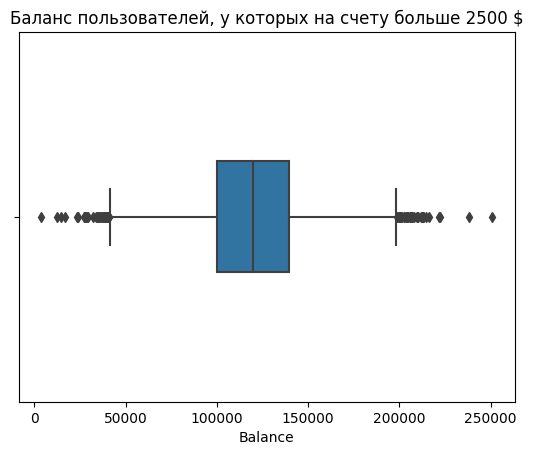

In [40]:
# выводим коробчатую диаграмму для заданных пользователей
# фильтр в 2500 долларов позволил не учитывать пользователей с нулевыми или околонулевыми счетами
boxplot = sns.boxplot(
    churn_data[churn_data['Balance'] > 2500],
    x='Balance',
    width=0.3
    ).set_title('Баланс пользователей, у которых на счету больше 2500 $', fontsize=12)

### 9.2 Выводы:
1. Медианное значение приблизительно равно среднему
2. Большое количество выбросов сосредоточено сразу за пределами "усов", что говорит о том, что значения в пределах усов и вне достаточно близки друг к другу
3. Распределение плавное, без существенных аномалий
4. Коробочка достаточно узкая, что означает, что у большинства пользователей в банке находятся средства в диапазоне 100 - 130 тысяч долларов.



## 9.3 Задание
Посмотрите на распределение баланса клиента в разрезе признака оттока.

Как различаются суммы на накопительном счёте ушедших и лояльных клиентов?

Подумайте и напишите, с чем это может быть связано, что может не устраивать ушедших клиентов в банке.

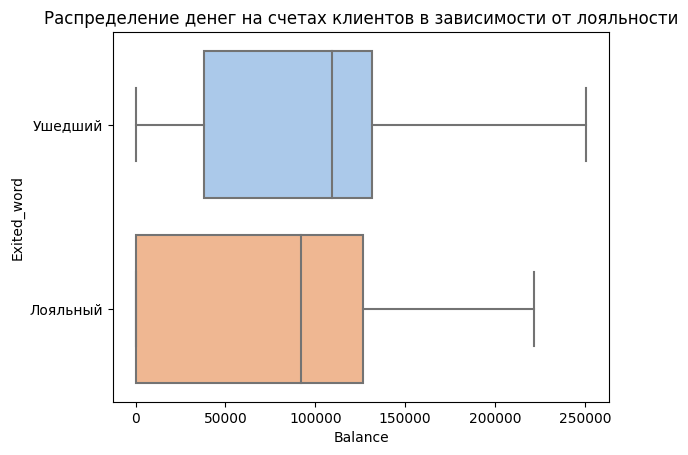

In [41]:
# выводим коробчатые диаграммы ушедших и лояльных клиентов по признаку баланса счёта
histplot = sns.boxplot(
    churn_data,
    x='Balance',
    y='Exited_word',
    palette='pastel',
    ).set_title('Распределение денег на счетах клиентов в зависимости от лояльности', fontsize=12)

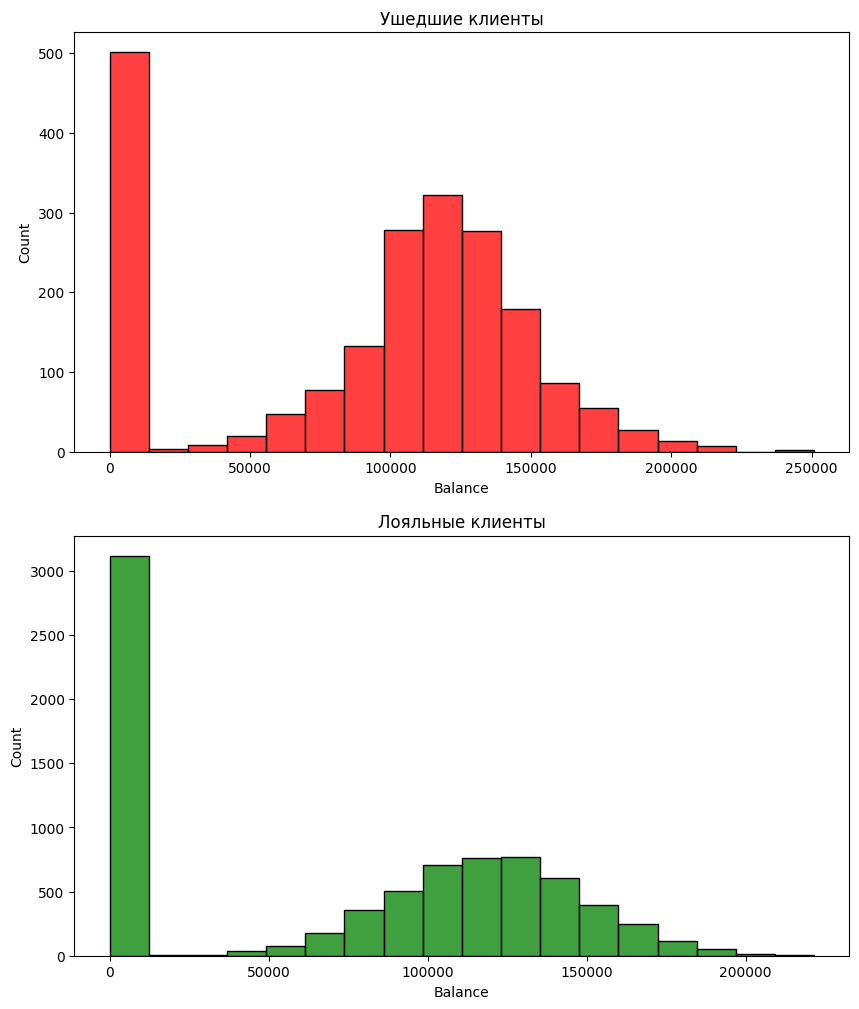

In [42]:
# выводим две гистограммы количества клиентов с различными суммами на их счетах:
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(10, 12))
# среди ушедших клиентов
sns.histplot(
    churn_data[churn_data['Exited_word'] == 'Ушедший'],
    x='Balance',
    color='red',
    ax=axes[0]
).set_title('Ушедшие клиенты', fontsize=12);
# среди лояльных клиентов
sns.histplot(
    churn_data[churn_data['Exited_word'] == 'Лояльный'],
    x='Balance',
    color='green',
    ax=axes[1],
).set_title('Лояльные клиенты', fontsize=12);

### 9.3 Выводы:
1. По коробчатой диаграмме видно, что баланс ушедших клиентов в среднем выше, чем у лояльных.
2. Так как подозрительно выглядит отсутствие "левого уса" у лояльных клиентов, построил гистограммы, на которых видно, что доля клиентов с нулевым балансом у лояльных клиентов значительно превышает аналогичную долю у ушедших.
3. В остальном картины схожи

## 9.4 Задание
Посмотрите на распределение возраста в разрезе признака оттока.

В какой группе больше потенциальных выбросов?

На какую возрастную категорию клиентов стоит обратить внимание банку?

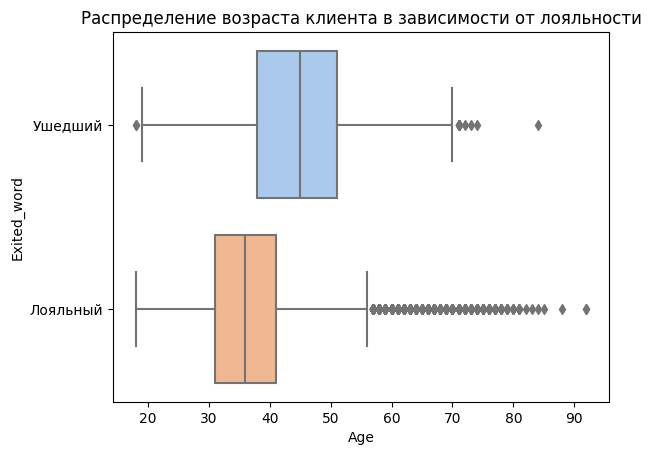

In [43]:
# выводим коробчатые диаграммы ушедших и лояльных клиентов по признаку возраста клиента
boxplot = sns.boxplot(
    churn_data,
    x='Age',
    y='Exited_word',
    palette='pastel',
    ).set_title('Распределение возраста клиента в зависимости от лояльности', fontsize=12)

### 9.4 Ответы:
1. Выбросов очевидно больше в возрастной группе лояльных клиентов
2. Банку стоит обратить внимание на группу в возрасте 40-50 лет, выяснить, почему они уходят и исправить это

## 9.5 Задание
Постройте график, который показывает взаимосвязь кредитного рейтинга клиента и его предполагаемой зарплаты.

Добавьте расцветку по признаку оттока клиентов. Какова взаимосвязь между признаками?

Если не видите явной взаимосвязи, укажите это.

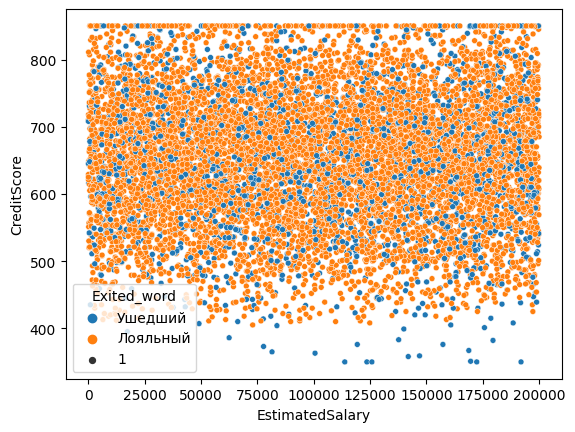

In [44]:
# выводим диаграмму рассеивания зависимости кредитного рейтинга клиента от его предполагаемой зарплаты
scat = sns.scatterplot(
    churn_data,
    x='EstimatedSalary',
    y='CreditScore',
    # доп.признак - статус лояльности клиента - выделяем цветом
    hue='Exited_word',
    # объяснение "size=1" ниже, в выводах
    size=1
)

### 9.5 Выводы:
Зависимость кредитного рейтинга от предполагаемой зарплаты не прослеживается в данной базе данных.
По признаку оттока клиентов можно обратить внимание разве что на то, что клиенты с кредитным рейтингом < 400 гарантированно уходят

PS. Попробовал найти способ изменить размер маркеров - ни один из параметров адекватно не подошёл, разве что параметр size, с помощью которого стандатно можно изменять величину маркеров в зависимости от одного из признаков, позволил уменьшить все маркеры до вида, где они не так сильно сливаются

## 9.6 Задание
Кто чаще уходит, мужчины или женщины?

Постройте график, который иллюстрирует это.
<!-- Подсказка -->
<!-- Процент ушедших клиентов в каждой группе можно рассчитать как среднее по столбцу Exited (так как 1 — это ушедшие клиенты, а 0 — лояльные, среднее арифметическое по столбцу обозначает долю ушедших клиентов). -->

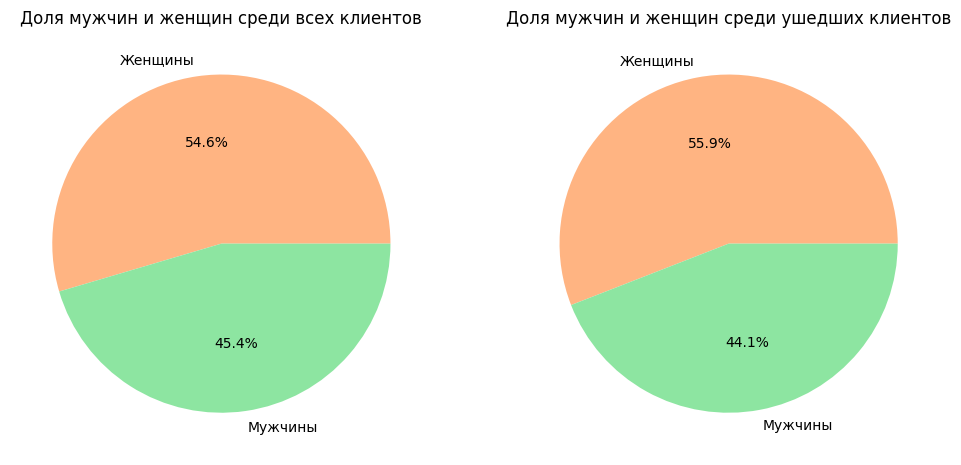

In [112]:
# выделяем в отдельную базу данных ушедших клиентов
gone = churn_data[churn_data['Exited_word'] == 'Ушедший']
# создаём метки для секторов отдельной переменной, чтобы не нагромождать основную строчку кода
labels = ['Женщины', 'Мужчины'] 
# смягчаем палитру с помощью библиотеки seaborn
colors = sns.color_palette('pastel')[1:-1]
# создаём и выводим на экран круговую диаграмму, добавив дополнительную диаграмму доли мужчин и женщин
# среди всех клиентов, чтобы посмотреть на картину чуть шире
fig, axes = plt.subplots(figsize=(12,6), ncols=2)
axes[0].pie(churn_data['Gender'].value_counts(), labels=labels, colors=colors, autopct='%.1f%%')
axes[1].pie(gone['Gender'].value_counts(), labels=labels, colors=colors, autopct='%.1f%%')
axes[0].set_title('Доля мужчин и женщин среди всех клиентов')
axes[1].set_title('Доля мужчин и женщин среди ушедших клиентов');


### 9.6 Вывод
Среди ушедших клиентов выше процент женщин, но, учитывая, что среди всех клиентов так же женщин большинство, с разницей в один процент, можно считать, что лояльность клиентов не зависит от пола.

## 9.7 Задание
Как отток клиентов зависит от числа приобретённых у банка услуг?

Для ответа на этот вопрос постройте многоуровневую столбчатую диаграмму.

In [133]:
# создаём сводную таблицу, в которую складываем значения лояльности клиентов
# в зависимости от количества купленных продуктов
pivot = churn_data.pivot_table(
    'CustomerId',
    index='NumOfProducts',
    columns='Exited_word',
    aggfunc='count'
)

# выводим многоуровневую столбчатую диаграмму
# в горизонтальном виде показалась более приятна для взгляда
px.bar(pivot,
       orientation='h',
       title='Зависимость лояльности клиентов от количества купленных продуктов'
       )

### 9.7 Вывод
Меньше всего уходят клиенты, купившие 2 услуги, значительно больше (в процентном соотношении) - купившие 1 услугу, а купившие 3 или 4 услуги, уходят почти все.

## 9.8 Задание
Как влияет наличие статуса активного клиента на отток клиентов?

Постройте диаграмму, иллюстрирующую это. Что бы вы предложили банку, чтобы уменьшить отток клиентов среди неактивных?

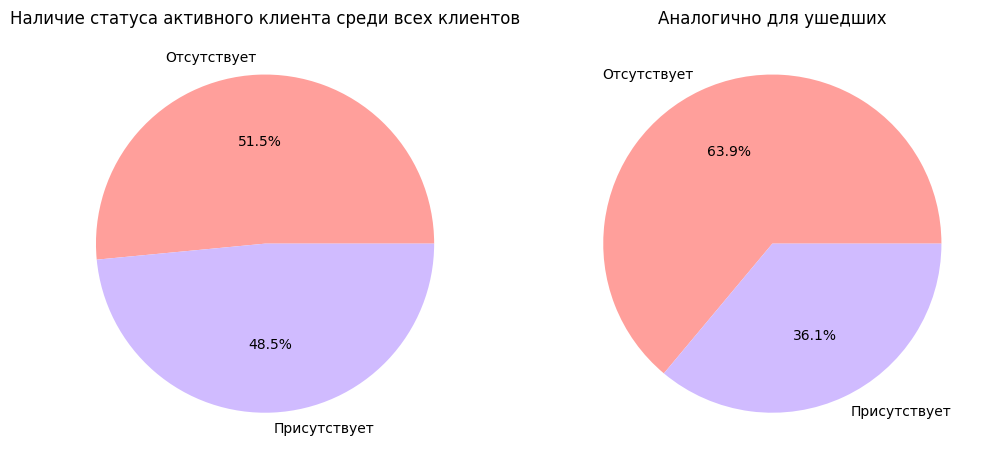

In [146]:
# используем выделенную ранее базу данных ушедших клиентов gone
# создаём метки для секторов отдельной переменной, чтобы не нагромождать основную строчку кода
labels = ['Отсутствует', 'Присутствует'] 
# смягчаем палитру с помощью библиотеки seaborn
colors = sns.color_palette('pastel')[3:5]
# создаём и выводим на экран круговую диаграмму, добавив дополнительную диаграмму наличия статуса актиного клиента
# среди всех клиентов, чтобы посмотреть на картину чуть шире
fig, axes = plt.subplots(figsize=(12,6), ncols=2)
axes[0].pie(churn_data['IsActiveMember'].value_counts(), labels=labels, colors=colors, autopct='%.1f%%')
axes[1].pie(gone['IsActiveMember'].value_counts(), labels=labels, colors=colors, autopct='%.1f%%')
axes[0].set_title('Наличие статуса активного клиента среди всех клиентов')
axes[1].set_title('Аналогично для ушедших');

### 9.8 Вывод
Статус активного клиента существенно влияет на отток клиентов.
Чтобы уменьшить отток клиентов, вероятно, следует попытаться уменьшить общую долю неактивных клиентов, что снизит количество ушедших

## 9.9 Задание
В какой стране доля ушедших клиентов больше?

Постройте тепловую картограмму, которая покажет это соотношение на карте мира.

Предположите, с чем это может быть связано.

In [166]:
# создаём сводную таблицу зависимости процента ушедших клиентов от страны проживания
pivot = churn_data.pivot_table(
    values='Exited',
    index='Geography'
)

# выводим тепловую карту на географической по созданной сводной таблице
px.choropleth(
    pivot,
    locations=pivot.index,
    locationmode='country names',
    color='Exited',
    title='Доля ушедших клиентов по странам'
)

### 9.9 Вывод
Максимальная доля ушедших клиентов в Германии.
Вероятно в Германии меньше всего развит маркетинг данного банка или отсутствует связь банка с немецкими организациями.

## 9.10 Задание
Переведите числовой признак CreditScore в категориальный.

Для этого воспользуйтесь функцией get_credit_score_cat(), которая приведена ниже.

Примените её к столбцу CreditScore и создайте новый признак CreditScoreCat — категории кредитного рейтинга.
       
Постройте сводную таблицу, строками которой являются категории кредитного рейтинга (CreditScoreCat), а столбцами — количество лет, в течение которых клиент пользуется услугами банка (Tenure).

В ячейках сводной таблицы должно находиться среднее по признаку оттока (Exited) — доля ушедших пользователей.

На основе полученной сводной таблицы постройте тепловую карту с аннотацией.

Найдите на тепловой карте категории клиентов, которые уходят чаще всего.

In [167]:
def get_credit_score_cat(credit_score):
    if credit_score >= 300 and credit_score < 500:
        return "Very_Poor"
    elif credit_score >= 500 and credit_score < 601:
        return "Poor"
    elif credit_score >= 601 and credit_score < 661:
        return "Fair"
    elif credit_score >= 661 and credit_score < 781:
        return "Good"
    elif credit_score >= 781 and credit_score < 851:
        return "Excellent"
    elif credit_score >= 851:
        return "Top"
    elif credit_score < 300:
        return "Deep"

In [179]:
churn_data['CreditScoreCat'] = churn_data['CreditScore'].apply(get_credit_score_cat)
pivot = round(churn_data.pivot_table(
    index = 'CreditScoreCat',
    columns = 'Tenure',
    values = 'Exited'
), 2);
fig = px.imshow(pivot, text_auto = True, title = 'Тепловая карта оттока клиентов')
fig.show()

### 9.10 Выводы
1. Чаще всего уходят клиенты с самым низким кредитным рейтингом, причём чаще всего в течение первого года.
2. Следом идут клиенты с самым высоким кредитным рейтингом, либо так же в первый год, либо по истечению 9-10 лет.